# **Capstone Project - The Battle of the Neighborhoods** (Week1)

# Table of Contents
* [Introduction](#introduction)
* [Data Collection](#data_collection)
* [Analysis and Discussion](#analysis_and_discussion)
* [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

In this project we will compare two cities in west Canada: Vancouver and Edmonton, to find out which city/neighborhoods is optimum for the operation of seasonal food truck services and what is the best time period for the operation. Therefore, two key parameters are considered here: **location** and **time**. 

For location selection, the ideal places to operate a food truck is large open space with potentially high population density, such as parks or beaches during summertime. 

For the selection of operation time, temperature is one of the most important parameters. Generally, people are likely to gather at parks or beaches under warm weather and stay indoor if it is extremely hot or cold outside. Therefore, it is rational to start the business when the weather is warm enough and terminate before it gets too cold. 

Our data sources are listed as follows:

Temperature data:  
https://www.currentresults.com/Weather/Canada/British-Columbia/Places/vancouver-temperatures-by-month-average.php  
https://www.currentresults.com/Weather/Canada/Alberta/Places/edmonton-temperatures-by-month-average.php  

Postal code and neighborhoods:  
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V  
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T  

Coordinates of neighborhoods:  
http://www.geonames.org/postalcode-search.html?q=BC&country=CA  
https://www.geonames.org/postal-codes/CA/AB/alberta.html  

Location service:  
https://foursquare.com/  

In [2]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline 

# Data Collection <a name="data_collection"></a>

### Collecte Postal Code and Neighborhoods Information for the City of  Vancouver

pandas is used to read information from wiki page

In [3]:
vdfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V")
vdf = vdfs[0]
vdf.head()

,0,1,2,3,4,5,6,7,8
0,V1AKimberley,V2APenticton,V3ALangley Township(Langley City),V4ASurreySouthwest,V5ABurnaby(Government Road / Lake City / SFU /...,V6AVancouver(Strathcona / Chinatown / Downtown...,V7ARichmondSouth,V8APowell River,V9AVictoria(Vic West / Esquimalt)Canadian Forc...
1,V1BVernonEast,V2BKamloopsNorthwest,V3BPort CoquitlamCentral,V4BWhite Rock,V5BBurnaby(Parkcrest-Aubrey / Ardingley-Sprott),V6BVancouver(NE Downtown / Gastown / Harbour C...,V7BRichmond(Sea Island / YVR),V8BSquamish,V9BVictoria(West Highlands / North Langford / ...
2,V1CCranbrook,V2CKamloopsCentral and Southeast,V3CPort CoquitlamSouth,V4CDeltaNortheast,V5CBurnaby(Burnaby Heights / Willingdon Height...,V6CVancouver(Waterfront / Coal Harbour / Canad...,V7CRichmondNorthwest,V8CKitimat,V9CVictoria(Colwood / South Langford / Metchosin)
3,V1ESalmon Arm,V2EKamloopsSouth and West,V3ECoquitlamNorth,V4EDeltaEast,V5EBurnaby(Lakeview-Mayfield / Richmond Park /...,V6EVancouver(SE West End / Davie Village),V7ERichmondSouthwest,V8EWhistler,V9EVictoria(East Highlands / NW Saanich)
4,V1GDawson Creek,V2GWilliams Lake,V3GAbbotsfordEast,V4GDeltaEast Central,V5GBurnaby(Cascade-Schou / Douglas-Gilpin),V6GVancouver(NW West End / Stanley Park),V7GNorth Vancouver (district municipality)Oute...,V8GTerrace,V9GLadysmith


### Data Wrangling

It can be seen from the results that each block contains the information of postal code (first three letter/number), name of the city and name of neiborghhoods. The next step is to clean up the data.

First, lets pick the blocks with the keyword "Vancouver" in it and convert the results into a dictionary.

In [4]:
testlist = []
for i in range(vdf.shape[0]):
    for j in range(vdf.shape[1]):
        if 'Vancouver' in vdf.loc[i,j]:
            testlist.append(vdf.loc[i,j])
vdict = {key: i for i, key in enumerate(testlist)}
vdict

{'V6AVancouver(Strathcona / Chinatown / Downtown Eastside)': 0,
 'V6BVancouver(NE Downtown / Gastown / Harbour Centre / International Village / Victory Square / Yaletown)': 1,
 'V6CVancouver(Waterfront / Coal Harbour / Canada Place)': 2,
 'V6EVancouver(SE West End / Davie Village)': 3,
 'V6GVancouver(NW West End / Stanley Park)': 4,
 'V7GNorth Vancouver (district municipality)Outer East': 5,
 'V6HVancouver(West Fairview / Granville Island / NE Shaughnessy)': 6,
 'V7HNorth Vancouver (district municipality)Inner East': 7,
 'V6JVancouver(NW Shaughnessy / East Kitsilano / Quilchena)': 8,
 'V7JNorth Vancouver (district municipality)East Central': 9,
 'V5KVancouver(North Hastings-Sunrise)': 10,
 'V6KVancouver(Central Kitsilano / Greektown)': 11,
 'V7KNorth Vancouver (district municipality)North Central': 12,
 'V5LVancouver(North Grandview-Woodland)': 13,
 'V6LVancouver(NW Arbutus Ridge / NE Dunbar-Southlands)': 14,
 'V7LNorth Vancouver (city)South Central': 15,
 'V5MVancouver(South Hastings-

Next, we convert this dictionary into a pandas dataframe

In [5]:
vdf = pd.DataFrame.from_dict(vdict, orient='index').reset_index()
vdf = vdf.drop(columns = 0, axis = 1)
vdf.head()

,index
0,V6AVancouver(Strathcona / Chinatown / Downtown...
1,V6BVancouver(NE Downtown / Gastown / Harbour C...
2,V6CVancouver(Waterfront / Coal Harbour / Canad...
3,V6EVancouver(SE West End / Davie Village)
4,V6GVancouver(NW West End / Stanley Park)


As all the information are contained in one block, we will parse the data according to their structure:  
First three letter/number are parsed as postal code;  
Name of the city/borough appears after the postal code and before "(";  
Name of the neighborhoods are in the "()"  

In [6]:
vdf['Postal Code'] = vdf['index'].astype(str).str[0:3]
vdf['Borough'] = vdf['index'].astype(str).str[3:].str.extract(r'(.+?(?=\())')
vdf['Neighborhood'] = vdf['index'].astype(str).str[3:].str.extract(r'\((.*)\)')
vdf.head(40)

,index,Postal Code,Borough,Neighborhood
0,V6AVancouver(Strathcona / Chinatown / Downtown...,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside
1,V6BVancouver(NE Downtown / Gastown / Harbour C...,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...
2,V6CVancouver(Waterfront / Coal Harbour / Canad...,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place
3,V6EVancouver(SE West End / Davie Village),V6E,Vancouver,SE West End / Davie Village
4,V6GVancouver(NW West End / Stanley Park),V6G,Vancouver,NW West End / Stanley Park
5,V7GNorth Vancouver (district municipality)Oute...,V7G,North Vancouver,district municipality
6,V6HVancouver(West Fairview / Granville Island ...,V6H,Vancouver,West Fairview / Granville Island / NE Shaughnessy
7,V7HNorth Vancouver (district municipality)Inne...,V7H,North Vancouver,district municipality
8,V6JVancouver(NW Shaughnessy / East Kitsilano /...,V6J,Vancouver,NW Shaughnessy / East Kitsilano / Quilchena
9,V7JNorth Vancouver (district municipality)East...,V7J,North Vancouver,district municipality


It appears that by using 'Vancouver' as keyword, we also included North Vancouver and West Vancouver in our dataframe. Now let's remove them and only keep the information of Vancouver

In [7]:
vdf = vdf[vdf.Neighborhood != 'district municipality']
vdf = vdf[vdf.Neighborhood != 'city']
vdf = vdf.dropna()
vdf.reset_index(inplace = True)
vdf

,level_0,index,Postal Code,Borough,Neighborhood
0,0,V6AVancouver(Strathcona / Chinatown / Downtown...,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside
1,1,V6BVancouver(NE Downtown / Gastown / Harbour C...,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...
2,2,V6CVancouver(Waterfront / Coal Harbour / Canad...,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place
3,3,V6EVancouver(SE West End / Davie Village),V6E,Vancouver,SE West End / Davie Village
4,4,V6GVancouver(NW West End / Stanley Park),V6G,Vancouver,NW West End / Stanley Park
5,6,V6HVancouver(West Fairview / Granville Island ...,V6H,Vancouver,West Fairview / Granville Island / NE Shaughnessy
6,8,V6JVancouver(NW Shaughnessy / East Kitsilano /...,V6J,Vancouver,NW Shaughnessy / East Kitsilano / Quilchena
7,10,V5KVancouver(North Hastings-Sunrise),V5K,Vancouver,North Hastings-Sunrise
8,11,V6KVancouver(Central Kitsilano / Greektown),V6K,Vancouver,Central Kitsilano / Greektown
9,13,V5LVancouver(North Grandview-Woodland),V5L,Vancouver,North Grandview-Woodland


Check how many neighborhoods are there in Vancouver

In [8]:
print (vdf.shape)

(31, 5)


### Collecte Postal Code and Coordinates of Neighborhoods for the City of  Vancouver

pandas is used to read information from web page that contains the name, postal code and coordinates of neighborhoods in vancouver

In [13]:
corvdf = pd.read_html("http://www.geonames.org/postalcode-search.html?q=BC&country=CA")
corvdf = corvdf[2]
corvdf.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,NaN,NaN
1,NaN,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,NaN,NaN
3,NaN,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,NaN,NaN


Replace the NaN vlaue with 0, and check the head

In [14]:
corvdf.fillna(value = 0, inplace=True)
corvdf.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,0,0
1,0.0,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,0,0
3,0.0,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,0,0


Also check the tail

In [15]:
corvdf.tail()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
380,191.0,Burnaby (Government Road / Lake City / SFU / B...,V5A,Canada,British Columbia,Burnaby,0
381,0.0,49.264/-122.937,49.264/-122.937,49.264/-122.937,49.264/-122.937,49.264/-122.937,49.264/-122.937
382,192.0,Dawson Creek,V1G,Canada,British Columbia,0,0
383,0.0,55.767/-120.236,55.767/-120.236,55.767/-120.236,55.767/-120.236,55.767/-120.236,55.767/-120.236
384,0.0,0,0,0,0,0,0


The last row has different format and no information. Therefore it will be dropped

In [16]:
corvdf = corvdf[0:384]

Now parse the coordinate data and place the **latitude** and **longitude** into column **'Admin2'** and **'Admin3'** respectively

In [17]:
for index, rows in corvdf.iterrows():
    if corvdf.loc[index, 'Admin2'] == 0 or corvdf.loc[index, 'Admin3'] == 0:
        corvdf.at[index, 'Admin2'] = float(re.search('(.+?(?=\/))', corvdf.loc[index + 1 , 'Admin2']).group())
        corvdf.at[index, 'Admin3'] = float(re.search('\/(.*)', corvdf.loc[index + 1 , 'Admin2']).group()[1:])
corvdf.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,Port Moody,V3H,Canada,British Columbia,49.323,-122.863
1,0.0,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,2.0,Pitt Meadows,V3Y,Canada,British Columbia,49.221,-122.69
3,0.0,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,3.0,White Rock,V4B,Canada,British Columbia,49.026,-122.806


Drop the unwanted columns and rename the rest columns

In [18]:
corvdf.drop(columns = ['Unnamed: 0','Place','Country','Admin1'], axis=1, inplace=True)
corvdf.rename(columns={"Code": "Postal Code", "Admin2": "Latitude", "Admin3": "Longitude"}, inplace=True)
corvdf.reset_index()
corvdf.head()

,Postal Code,Latitude,Longitude
0,V3H,49.323,-122.863
1,49.323/-122.863,49.323/-122.863,49.323/-122.863
2,V3Y,49.221,-122.69
3,49.221/-122.69,49.221/-122.69,49.221/-122.69
4,V4B,49.026,-122.806


### Merge the Two Dataframe Based on Their Postal Codes

In [19]:
mergevdf = vdf.merge(corvdf, how='inner',left_on='Postal Code', right_on='Postal Code')
mergevdf.head()

,level_0,index,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,0,V6AVancouver(Strathcona / Chinatown / Downtown...,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091
1,1,V6BVancouver(NE Downtown / Gastown / Harbour C...,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...,49.279,-123.114
2,2,V6CVancouver(Waterfront / Coal Harbour / Canad...,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place,49.287,-123.116
3,3,V6EVancouver(SE West End / Davie Village),V6E,Vancouver,SE West End / Davie Village,49.283,-123.13
4,4,V6GVancouver(NW West End / Stanley Park),V6G,Vancouver,NW West End / Stanley Park,49.299,-123.141


Drop unwanted columns  
Change the data type from string to **float**  
Correct the coordinates of UBC

In [20]:
mergevdf.drop(columns = ['index', 'level_0'], axis=1, inplace=True)
mergevdf['Latitude'] = mergevdf['Latitude'].astype(float)
mergevdf['Longitude'] = mergevdf['Longitude'].astype(float)
mergevdf.at[22,'Latitude'] = 49.264
mergevdf.at[22,'Longitude'] = -123.2319
mergevdf.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,V6A,Vancouver,Strathcona / Chinatown / Downtown Eastside,49.278,-123.091
1,V6B,Vancouver,NE Downtown / Gastown / Harbour Centre / Inter...,49.279,-123.114
2,V6C,Vancouver,Waterfront / Coal Harbour / Canada Place,49.287,-123.116
3,V6E,Vancouver,SE West End / Davie Village,49.283,-123.130
4,V6G,Vancouver,NW West End / Stanley Park,49.299,-123.141


In [21]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Use geopy library to get the latitude and longitude values of Vancouver

In [22]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="van_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver are 49.2608724, -123.1139529.


### Create a map of Vancouver with neighborhoods superimposed on top.

In [23]:
# create map of Vancouver using latitude and longitude values
map_van = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(mergevdf['Latitude'], mergevdf['Longitude'], mergevdf['Borough'], mergevdf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_van)  
    
map_van

### Repeat the Same Procedure for Edmonton

First collect the data and organize into a dataframe

In [31]:
# Read raw data of Edmonton from wiki page
edfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T")
edf = edfs[0]

# Convert the data into a list then into dictionary
Edtestlist = []
for i in range(edf.shape[0]):
    for j in range(edf.shape[1]):
        if 'Edmonton' in edf.loc[i,j]:
            Edtestlist.append(edf.loc[i,j])

edict = {key: i for i, key in enumerate(testlist)}

# Convert the data into dataframe
edf = pd.DataFrame.from_dict(edict, orient='index').reset_index()
edf = edf.drop(columns = 0, axis = 1)

# Construct new columns of Postal Code, Borough and Neighborhood by parsing the data
edf['Postal Code'] = edf['index'].astype(str).str[0:3]
edf['Borough'] = edf['index'].astype(str).str[3:].str.extract(r'(.+?(?=\())')
edf['Neighborhood'] = edf['index'].astype(str).str[3:].str.extract(r'\((.*)\)')

# Correct the format
edf.at[19, 'Borough'] = 'Edmonton'
edf.at[19, 'Neighborhood'] = 'EdmontonSouthwest'
edf.dropna(axis = 0, inplace = True)
edf.reset_index(inplace = True)

# Read the coordinate information from https://www.geonames.org/postal-codes/CA/AB/alberta.html
coredf = pd.read_html("https://www.geonames.org/postal-codes/CA/AB/alberta.html")
# conver to dataframe using pandas
coredf = coredf[2]
coredf.fillna(value = 0, inplace=True)

# Select the data to use
coredf = coredf[0:308]

# Parse the longitude and latitude data
for index, rows in coredf.iterrows():
    if coredf.loc[index, 'Admin2'] == 0 or coredf.loc[index, 'Admin3'] == 0:
        coredf.at[index, 'Admin2'] = float(re.search('(.+?(?=\/))', coredf.loc[index + 1 , 'Admin2']).group())
        coredf.at[index, 'Admin3'] = float(re.search('\/(.*)', coredf.loc[index + 1 , 'Admin2']).group()[1:])

# Clean up the dataframe and rename all the columns        
coredf.drop(columns = ['Unnamed: 0','Place','Country','Admin1'], axis=1, inplace=True)
coredf.rename(columns={"Code": "Postal Code", "Admin2": "Latitude", "Admin3": "Longitude"}, inplace=True)
coredf.reset_index

# Merge the neighborhood dataframe with the coordinate dataframe using Postal Code
mergeedf = edf.merge(coredf, how='inner',left_on='Postal Code', right_on='Postal Code')

# Drop the unwanted columns
mergeedf.drop(columns = ['index','level_0'], axis=1, inplace=True)

# Change the data type of coordinates into float
mergeedf['Latitude'] = mergeedf['Latitude'].astype(float)
mergeedf['Longitude'] = mergeedf['Longitude'].astype(float)

mergeedf

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T5A,Edmonton,West Clareview / East Londonderry,53.593,-113.408
1,T6A,Edmonton,North Capilano,53.548,-113.432
2,T5B,Edmonton,East North Central / West Beverly,53.735,-113.337
3,T6B,Edmonton,SE Capilano / West Southeast Industrial / East...,53.513,-113.419
4,T5C,Edmonton,Central Londonderry,53.600,-113.455
5,T6C,Edmonton,Central Bonnie Doon,53.522,-113.459
6,T5E,Edmonton,West Londonderry / East Calder,53.745,-113.447
7,T6E,Edmonton,South Bonnie Doon / East University,53.491,-113.480
8,T5G,Edmonton,North Central / Queen Mary Park / Blatchford,53.571,-113.505
9,T6G,Edmonton,West University / Strathcona Place,53.521,-113.532


Then visualize the neighborhoods using geopy and folium

In [29]:
Edaddress = 'Edmonton, AB'

Edgeolocator = Nominatim(user_agent="ed_explorer")
Edlocation = Edgeolocator.geocode(Edaddress)
Edlatitude = Edlocation.latitude
Edlongitude = Edlocation.longitude
print('The geograpical coordinate of Edmonton are {}, {}.'.format(Edlatitude, Edlongitude))

The geograpical coordinate of Edmonton are 53.535411, -113.507996.


In [30]:
# create map of Edmonton using latitude and longitude values
map_ed = folium.Map(location=[Edlatitude, Edlongitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(mergeedf['Latitude'], mergeedf['Longitude'], mergeedf['Borough'], mergeedf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ed)  
    
map_ed

### Collect Temperature Profile for Vancouver (by Month)

Temperature data from "https://www.currentresults.com/index.php" will be read into pandas dataframe.  
The data contains the averaged monthly temperature over the past 10 years

In [29]:
url = 'https://www.currentresults.com/Weather/Canada/British-Columbia/Places/vancouver-temperatures-by-month-average.php'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

vantempdfs = pd.read_html(r.text)

In [49]:
vantempdf = vantempdfs[0]
vantempdf

,Month,High °C,Low °C
0,January,7,2
1,February,7,1
2,March,10,4
3,April,13,6
4,May,17,9
5,June,20,12
6,July,23,14
7,August,23,14
8,September,19,12
9,October,14,7


### Data Wrangling

We clean up the data by keeping only the month and temperature in °C

In [31]:
vantempdf.drop(columns = ['High °F','Low °F'], axis=1, inplace=True)
vantempdf.rename(columns={"Unnamed: 2": "Month"}, inplace=True)
vantempdf = vantempdf[0:12]
vantempdf.set_index('Month', inplace = True)
vantempdf

,High °C,Low °C
Month,,
January,7,2
February,7,1
March,10,4
April,13,6
May,17,9
June,20,12
July,23,14
August,23,14
September,19,12


### Data Visualization using Bar-chart

Lets plot the temperature profile for Vancouver first.

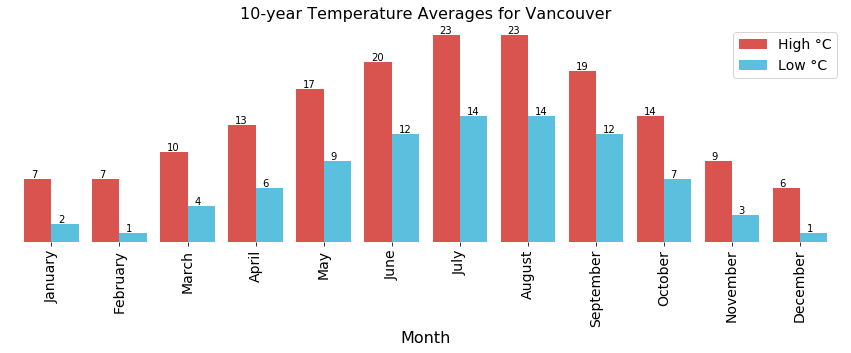

In [47]:
colors_list = ['#d9534f','#5bc0de']

# Change this line to plot percentages instead of absolute values
ax = vantempdf.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=vantempdf.columns,fontsize= 14)
plt.title("10-year Temperature Averages for Vancouver",fontsize= 16)
plt.xlabel('Month', fontsize=16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (x+0.1, y + height + 0.2))

Based on the data shown here, it appears that Vancouver is suitable for outdoor activity from **Apirl** to **October**

Now lets do the same for Edmonton and see if there is any difference

### Collect And Visualize the Temperature Profile for Edmonton (by Month)

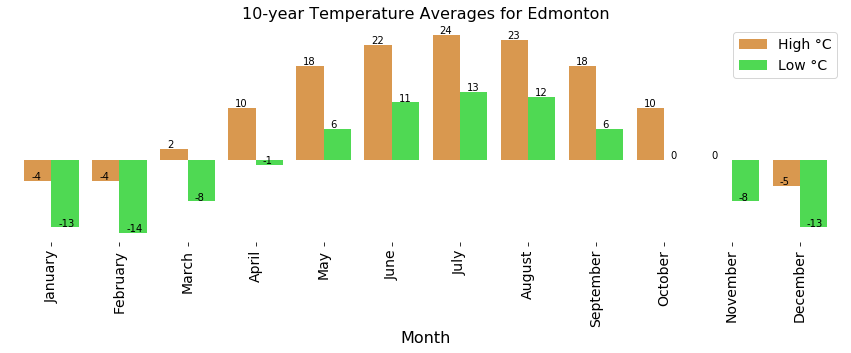

In [52]:
url2 = 'https://www.currentresults.com/Weather/Canada/Alberta/Places/edmonton-temperatures-by-month-average.php'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url2, headers=header)

edtempdfs = pd.read_html(r.text)
edtempdf = edtempdfs[0]
edtempdf.drop(columns = ['High °F','Low °F'], axis=1, inplace=True)
edtempdf.rename(columns={"Unnamed: 2": "Month"}, inplace=True)
edtempdf = edtempdf[0:12]
edtempdf.set_index('Month', inplace = True)

colors_list = ['#d9984f','#4fd953']

# Change this line to plot percentages instead of absolute values
ax1 = edtempdf.plot(kind='bar',figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=edtempdf.columns,fontsize= 14)
plt.title("10-year Temperature Averages for Edmonton",fontsize= 16)
plt.xlabel('Month', fontsize=16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.annotate('{:}'.format(height), (x+0.1, y + height + 0.2))

Based on the data shown here, it appears that Edmonton is suitable for outdoor activity from **May** to **September**

# Analysis and Discussion <a name="analysis_and_discussion"></a>

Analysis and discussion section to be finished in Week 2

# Conclusion <a name="conclusion"></a> 

Conclusion section to be finished in Week 2